# Introdução ao Pandas - Viagens do Governo | Visualização de dados

*Esse notebook usa uma [versão tratada](https://github.com/anicelysantos/introducao-jornalismo-de-dados/blob/main/Tratamento%20de%20dados.ipynb) da base de [viagens de funcionários do governo](http://www.portaltransparencia.gov.br/viagens) disponibilizado no portal da transparência.*

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

**Exemplo simples de uso da biblioteca matplotlib**

In [5]:
x = ['Janeiro', 'Fevereiro','Março','Abril','Maio']
y = [200000, 500000, 550000, 700000, 900000]

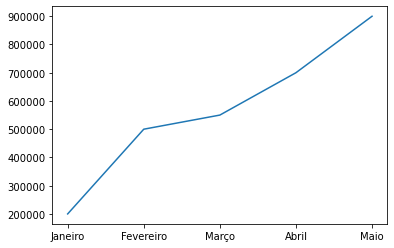

In [10]:
plt.plot(x,y)

In [43]:
df_viagens = pd.read_csv('viagens_tratado_2019.csv', encoding = 'latin-1', sep=';', parse_dates = ['Período - Data de início','Período - Data de fim'])

In [44]:
cidades = df_viagens.groupby(['cidade_destino'])['Valor passagens'].sum().sort_values(ascending=False).round(1).head(10).reset_index()

In [45]:
cidades

,cidade_destino,Valor passagens
0,Brasília,90418769.5
1,Informações protegidas por sigilo,48160610.6
2,Rio de Janeiro,30880616.7
3,São Paulo,26407457.1
4,Sem informação,22756133.1
5,Manaus,9059780.3
6,Recife,7213480.2
7,Belo Horizonte,6901541.9
8,Curitiba,6668706.0
9,Belém,6296614.0


**Utilizando a biblioteca no meu dataframe**

Text(0, 0.5, 'gastos com passagens')

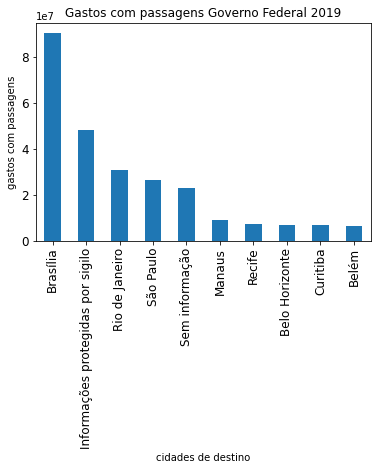

In [46]:
#kind é o tipo do gráfico, figsize é o tamanho do gráfico, title é o título do gráfico, legend é a legenda do gráfico 
#fontsize é o tamanho da fonte

cidades.plot(x = 'cidade_destino', y = 'Valor passagens', kind = 'bar', figsize = (6,4), title = 'Gastos com passagens Governo Federal 2019', 
             legend = False, fontsize = 12)

#Mudar a legenda dos eixos

plt.xlabel('cidades de destino')
plt.ylabel('gastos com passagens')

**Fazendo a mesma plotagem, mas usando variáveis**

Text(0, 0.5, 'gastos com passagens')

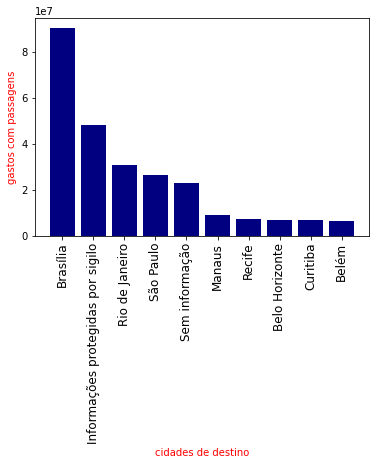

In [47]:
x = cidades['cidade_destino']
y = cidades['Valor passagens']
#color muda a cor do desenho no gráfico. Pode passar um nome ou um codigo hexadecimal
plt.bar(x,y, color = '#000080')

#xticks indica a direção da legenda no eixo desejado. No caso do exemplo é eixo x
plt.xticks(x, rotation = 'vertical', fontsize = 12)

#Titulo dos eixos
plt.xlabel('cidades de destino', color = 'r')
plt.ylabel('gastos com passagens', color = 'r')

**Gráfico de linha para fazer uma série temporal**

In [48]:
sigilo = df_viagens[df_viagens['cidade_destino'].str.contains('sigilo')]

In [49]:
policia_federal = sigilo[sigilo['Código órgão solicitante'] == 30108]

In [50]:
policia_federal.rename(columns = {'Período - Data de início':'data_inicio','Período - Data de fim':'data_fim'}, inplace = True)

C:\Users\anice\anaconda3\lib\site-packages\pandas\core\frame.py:4296: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


In [53]:
#sort_index para sequenciar, no caso daqui os meses. reset_index() para organizar o indice do dataframe
df_policiaFederal = policia_federal.data_inicio.dt.month.value_counts().sort_index().reset_index()

In [52]:
df_policiaFederal

,index,data_inicio
0,1,4218
1,2,4673
2,3,4803
3,4,4074
4,5,5144
5,6,3669
6,7,3915
7,8,3976
8,9,3478
9,10,4245


A coluna 'index' ficou com as informações do mês e a coluna 'data_inicio' com as informações da quantidade de viagens. Para consertar vou renomear as colunas.

In [54]:
df_policiaFederal.rename(columns = {'index':'mês','data_inicio':'viagens'}, inplace = True)

In [55]:
df_policiaFederal

,mês,viagens
0,1,4218
1,2,4673
2,3,4803
3,4,4074
4,5,5144
5,6,3669
6,7,3915
7,8,3976
8,9,3478
9,10,4245


([<matplotlib.axis.XTick at 0x1bd04fea520>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

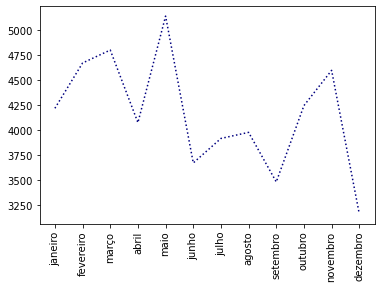

In [66]:
#Coloquei para aparecer o nome do mês ao invés do número
x = ['janeiro', 'fevereiro', 'março', 'abril','maio', 'junho', 'julho', 'agosto',
                 'setembro', 'outubro', 'novembro','dezembro']

y = df_policiaFederal['viagens']

#linestyle é para mudar o estilo de linha
plt.plot(x,y, linestyle = 'dotted', color = '#000080')
plt.xticks(x, rotation = 'vertical')